In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [4]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")  

In [4]:
# Check top few records to get a feel of the data structure
mpg_df.head(50)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


In [5]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car_name', axis=1)

In [6]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
5,15.0,8,429.0,198,4341,10.0,70,1,0
6,14.0,8,454.0,220,4354,9.0,70,1,0
7,14.0,8,440.0,215,4312,8.5,70,1,0
8,14.0,8,455.0,225,4425,10.0,70,1,0
9,15.0,8,390.0,190,3850,8.5,70,1,0


In [7]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [8]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0
5,15.0,8,429.0,198,4341,10.0,70,america,0
6,14.0,8,454.0,220,4354,9.0,70,america,0
7,14.0,8,440.0,215,4312,8.5,70,america,0
8,14.0,8,455.0,225,4425,10.0,70,america,0
9,15.0,8,390.0,190,3850,8.5,70,america,0


In [9]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be America, Europe and Asia... with one hot coding
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [10]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
5,15.0,8,429.0,198,4341,10.0,70,0,1,0,0
6,14.0,8,454.0,220,4354,9.0,70,0,1,0,0
7,14.0,8,440.0,215,4312,8.5,70,0,1,0,0
8,14.0,8,455.0,225,4425,10.0,70,0,1,0,0
9,15.0,8,390.0,190,3850,8.5,70,0,1,0,0


In [11]:
#Lets analysze the distribution of the dependent (mpg) column
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [12]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [13]:
# Note:  HP column is missing the describe output. That indicates something is not right with that column

In [14]:
#Check if the hp column contains anything other than digits 
# run the "isdigit() check on 'hp' column of the mpg_df dataframe. Result will be True or False for every row
# capture the result in temp dataframe and dow a frequency count using value_counts()
# There are six records with non digit values in 'hp' column

temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
# in temp dataframe

temp[temp['hp'] == False]   # from temp take only those rows where hp has false


,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [15]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)

In [16]:
#Let us see if we can get those records with nan

mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [17]:
# There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. 

In [18]:
#of the 398 rows 6 have NAN in the hp column. We will drop those 6 rows. Not a good idea under all situations
#note: HP is missing becauses of the non-numeric values in the column. 
#mpg_df = mpg_df.dropna()

In [19]:
#instead of dropping the rows, lets replace the missing values with median value. 
mpg_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [20]:
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#mpg_df = mpg_df.fillna(mpg_df.median())

mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


In [21]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      int64
origin_asia         int64
origin_europe       int64
dtype: object

In [22]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')  # converting the hp column from object / string type to float


In [23]:
mpg_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.530151,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.499718,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


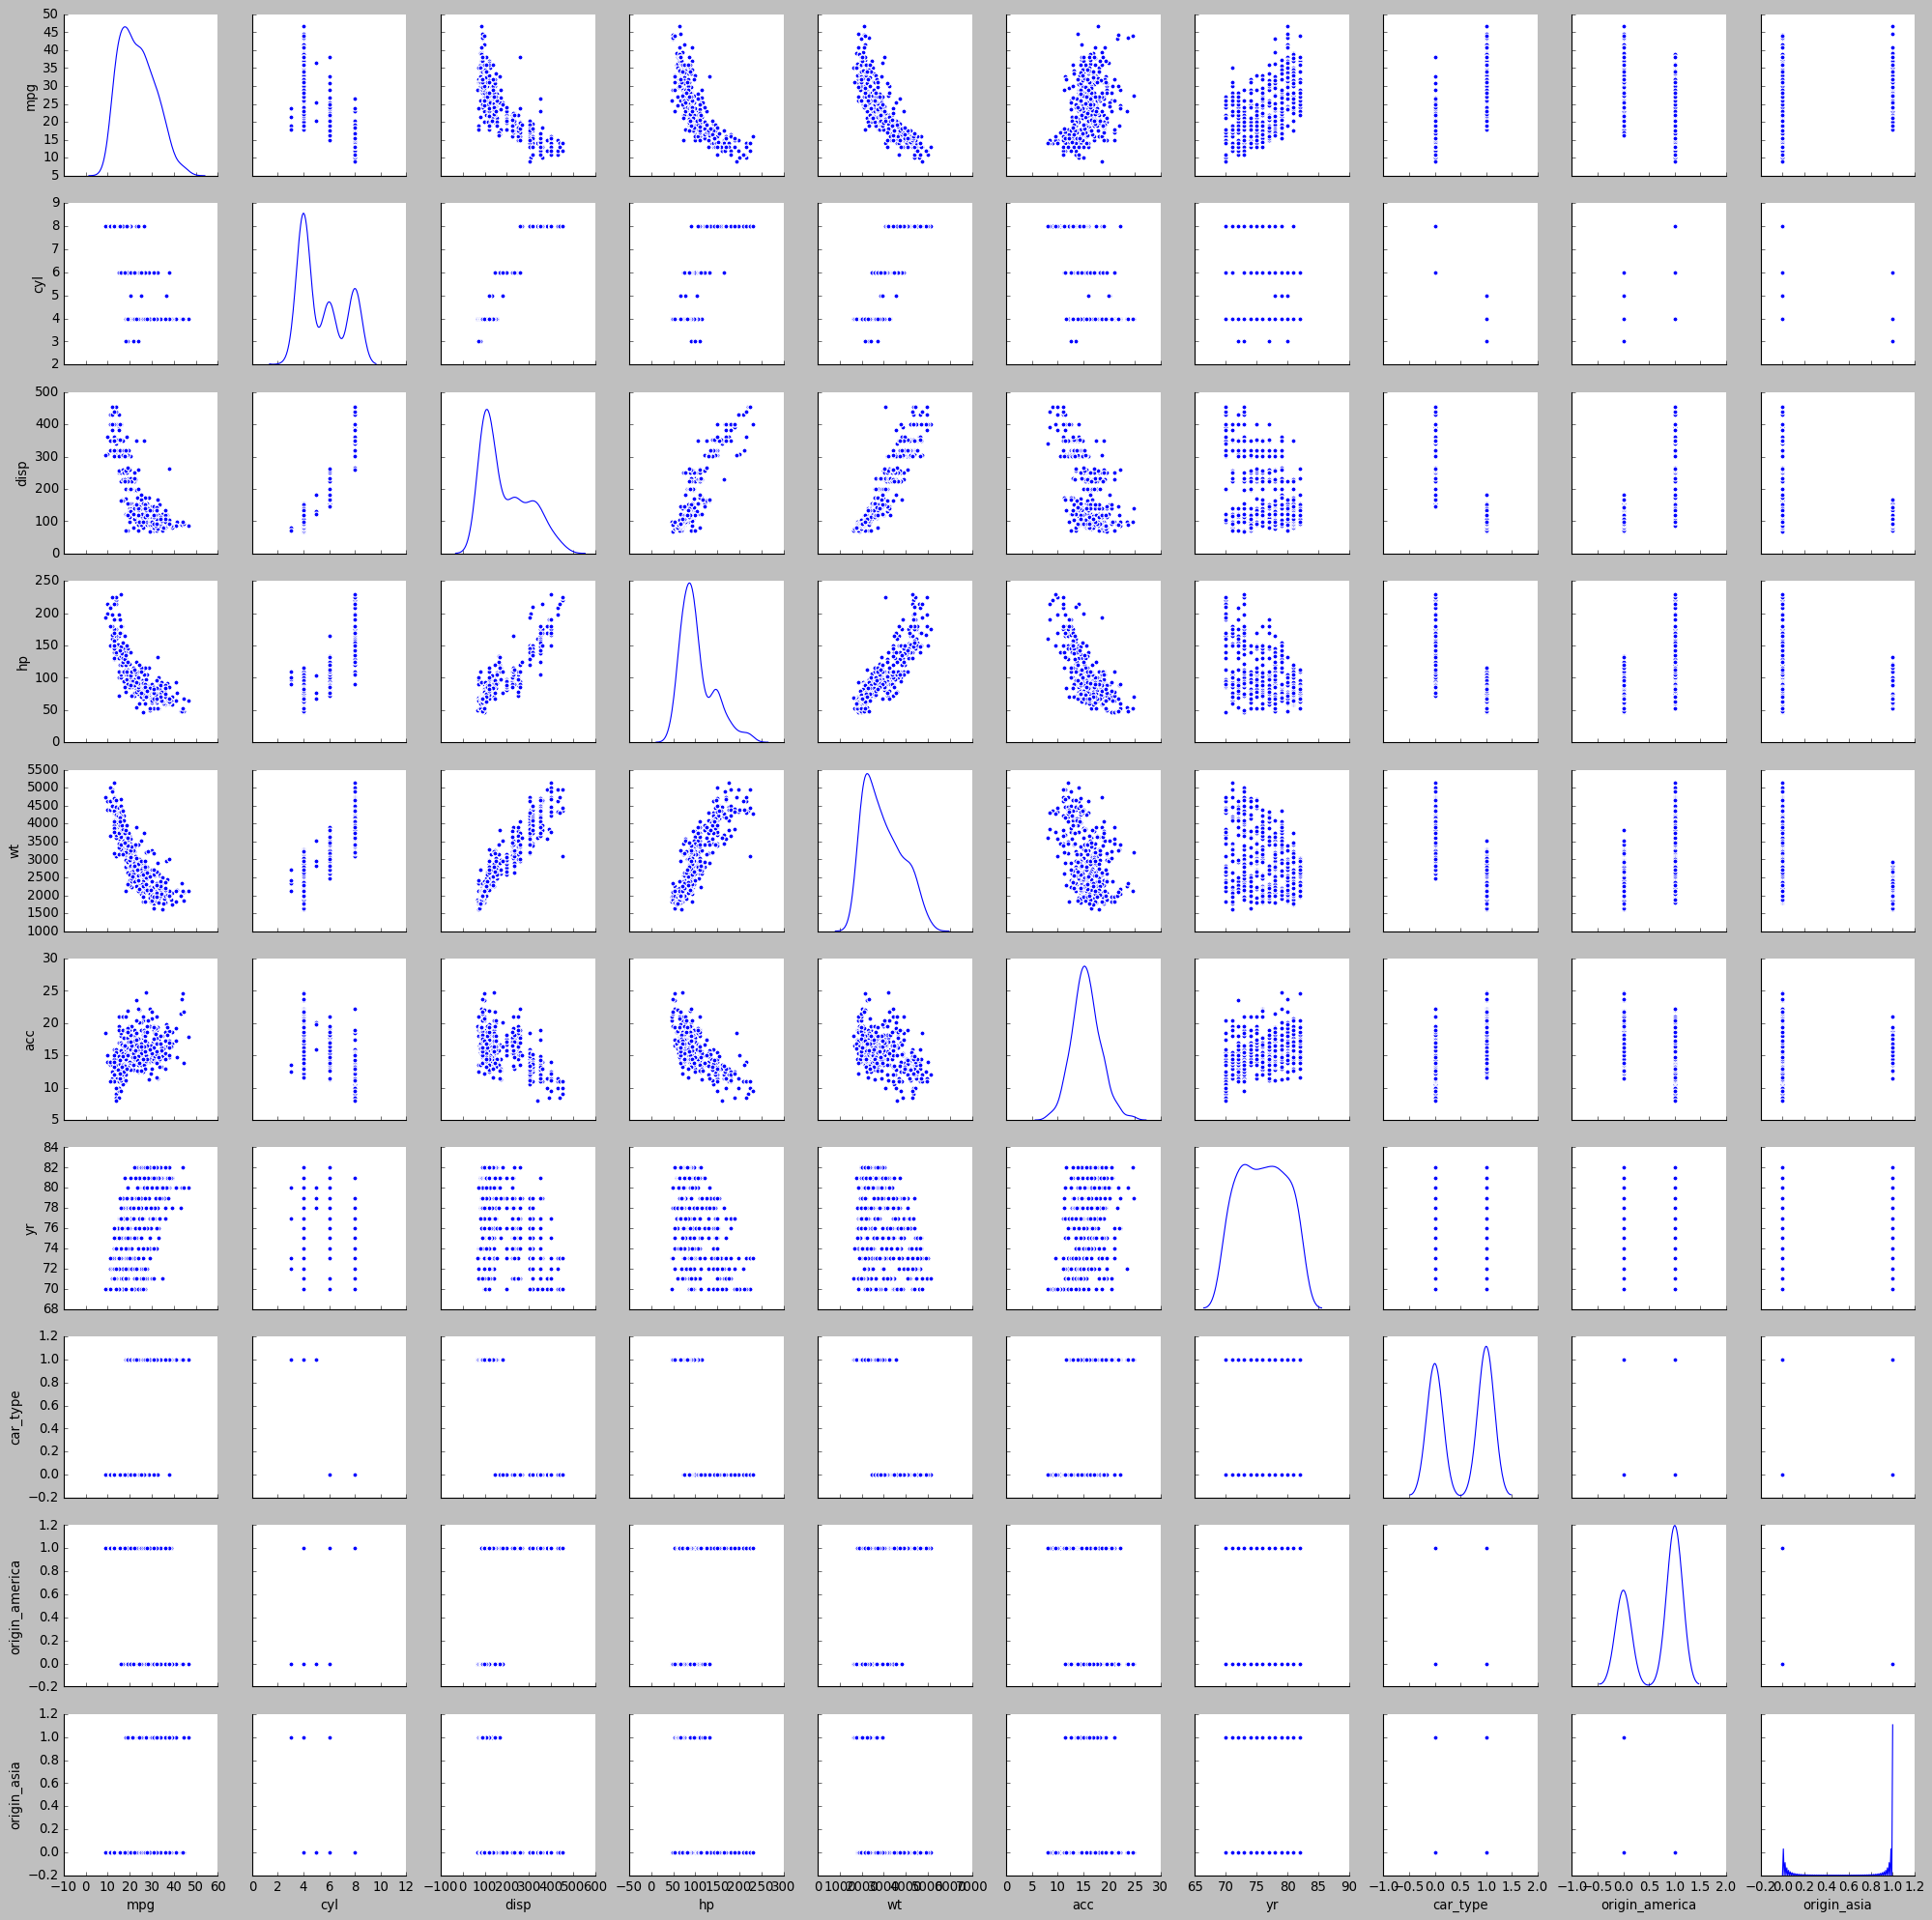

In [24]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:, 0:10]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [24]:
#The data distribution across various dimensions except 'Acc' do not look normal
#Close observation between 'mpg' and other attributes indicate the relationship is not really linear
#relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy
#How about 'mpg' vs 'yr' surprising to see a positive relation

In [25]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)
X = X.drop({'origin_america', 'origin_asia' ,'origin_europe'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]


In [26]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [27]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [28]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.863717833626987
The coefficient for disp is 0.010066050755003095
The coefficient for hp is -0.03922900629589667
The coefficient for wt is -0.006414996525192761
The coefficient for acc is 0.011723809488669147
The coefficient for yr is 0.7588184849759363
The coefficient for car_type is 6.626521339249245


In [30]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -26.69336012583209


In [31]:

regression_model.score(X_train, y_train)

0.8258091181337589

In [68]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.8404952015294239

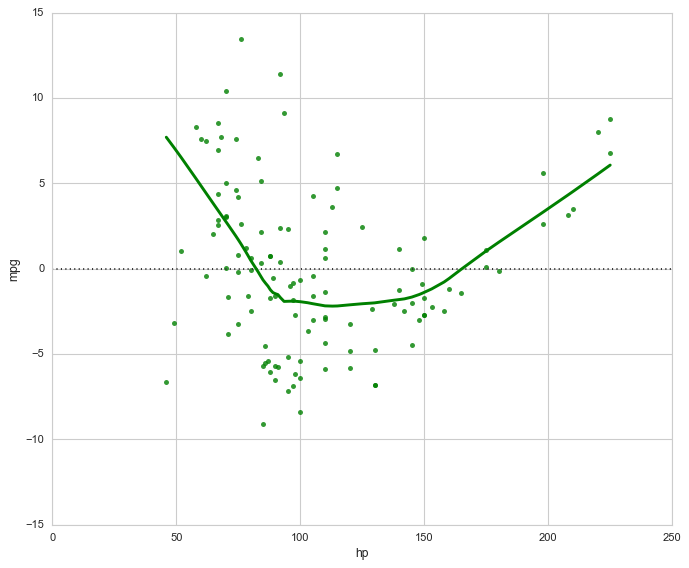

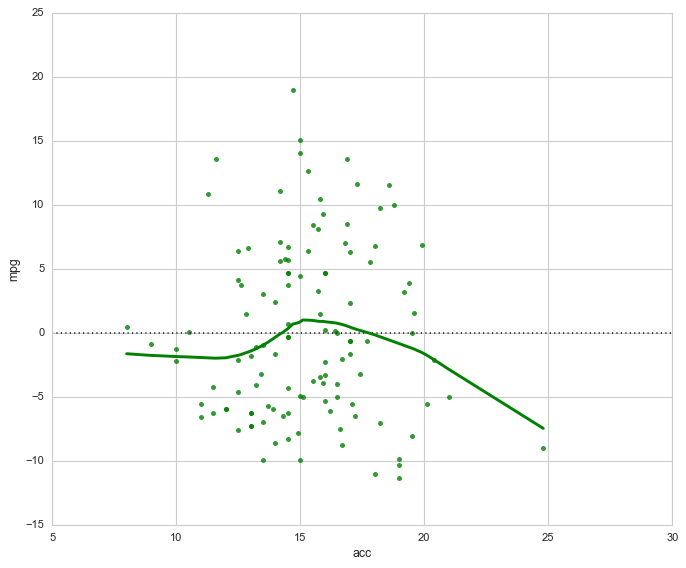

In [69]:
# Is OLS a good model ? Should we building a simple linear model ? Check the residuals for each predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )

In [72]:
# So the model explains 85% of the variability in Y using X

In [73]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [76]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()


,cyl,disp,hp,wt,acc,yr,car_type,mpg
350,4,105.0,63.0,2215,14.9,81,1,34.7
59,4,97.0,54.0,2254,23.5,72,1,23.0
120,4,121.0,112.0,2868,15.5,73,1,19.0
12,8,400.0,150.0,3761,9.5,70,0,15.0
349,4,91.0,68.0,1985,16.0,81,1,34.1


In [79]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type', data = data_train).fit()
lm1.params

Intercept   -26.693360
cyl           1.863718
disp          0.010066
hp           -0.039229
wt           -0.006415
acc           0.011724
yr            0.758818
car_type      6.626521
dtype: float64

In [80]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     182.9
Date:                Fri, 28 Sep 2018   Prob (F-statistic):           1.41e-98
Time:                        22:27:52   Log-Likelihood:                -725.17
No. Observations:                 278   AIC:                             1466.
Df Residuals:                     270   BIC:                             1495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6934      5.597     -4.769      0.0

In [81]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [82]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

3.053810365384955

In [83]:
# so there is avg of 3.0 (roundoff) mpg difference from real mpg on an avg

In [84]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

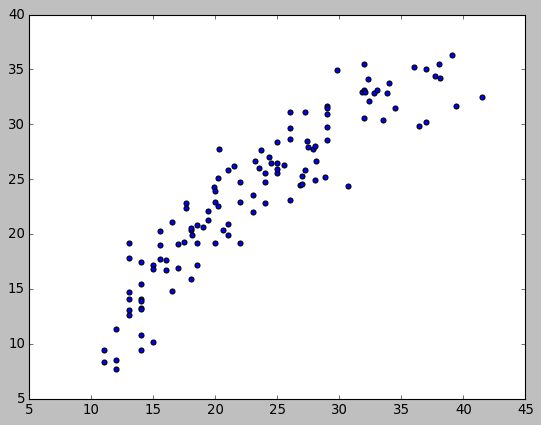

In [85]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['mpg'], y_pred)



In [86]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [87]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [88]:
from scipy.stats import zscore

mpg_df_scaled  = mpg_df.apply(zscore)

In [89]:
#convert the numpy array back into a dataframe 

mpg_df_scaled = pd.DataFrame(mpg_df_scaled, columns=mpg_df.columns)

In [90]:
#browse the contents of the dataframe. Check that all the values are now z scores

mpg_df_scaled

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
5,-1.090751,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
6,-1.218855,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
7,-1.218855,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
8,-1.218855,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
9,-1.090751,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-1.062235,0.773559,-0.497643,-0.461968


In [91]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df_scaled.drop('mpg', axis=1)
X = X.drop({'origin_america', 'origin_asia' ,'origin_europe'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df_scaled[['mpg']]


In [102]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [103]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.40560367304154227
The coefficient for disp is 0.1342870509041038
The coefficient for hp is -0.1918421956382497
The coefficient for wt is -0.6950483549628028
The coefficient for acc is 0.004136474479631518
The coefficient for yr is 0.3589858088084139
The coefficient for car_type is 0.42366946398475736


In [105]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.016865932919211776


In [108]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8404952015294237

In [109]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [110]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.3912052446554162

In [111]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

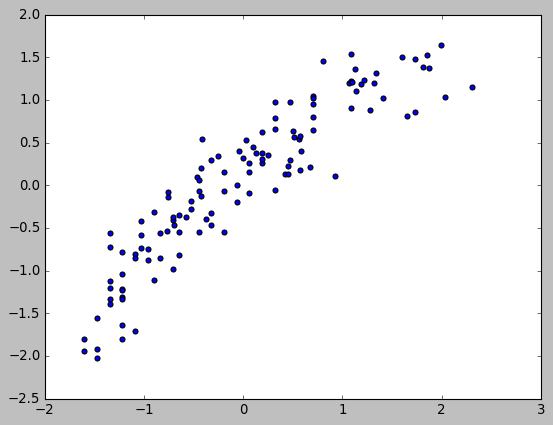

In [112]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test['mpg'], y_pred)